In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def loss_function_count_fig(path_ims_count_csv, path_femto_count_csv, path_save_name, dpi=300):
    # test adding the 0 or 1 for whether standard or Weibull loss functions
    dfi = pd.read_csv(path_ims_count_csv)
    dfp = pd.read_csv(path_femto_count_csv)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7),)


    title_list = [r"$\bf{(a)}$"+" IMS Most Successful Loss Function, by Percentage", 
                r"$\bf{(b)}$"+' PRONOSTIA Most Successful Loss Function, by Percentage']
    df_list = [dfi, dfp]

    sns.set(font_scale=1.0, style="whitegrid", font="DejaVu Sans")

    for ax, df, title in zip(axes.flat, df_list, title_list):      

        ax = sns.barplot(
            x="percent", y="loss_func", data=df, palette="Blues_d", ax=ax
        )

        for p in ax.patches:
            # help from https://stackoverflow.com/a/56780852/9214620
            space = 0.5
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() / 2
            value = p.get_width()
            ax.text(_x, _y, f"{value:.1f} %", ha="left", va="center", weight="semibold", size=12)

        ax.spines["bottom"].set_visible(True)
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.grid(alpha=0.7, linewidth=1, axis="x")
        ax.set_xticks([0])
        ax.set_xticklabels([], alpha=0)       
        ax.set_title(title, fontsize=12, loc='right')
        

    plt.subplots_adjust(wspace=0.8)
    sns.despine(left=True, bottom=True)
    plt.savefig(path_save_name, dpi=300, bbox_inches = "tight")
#     plt.show()
#     plt.cla()
#     plt.close()

/home/tim/Documents/weibull-knowledge-informed


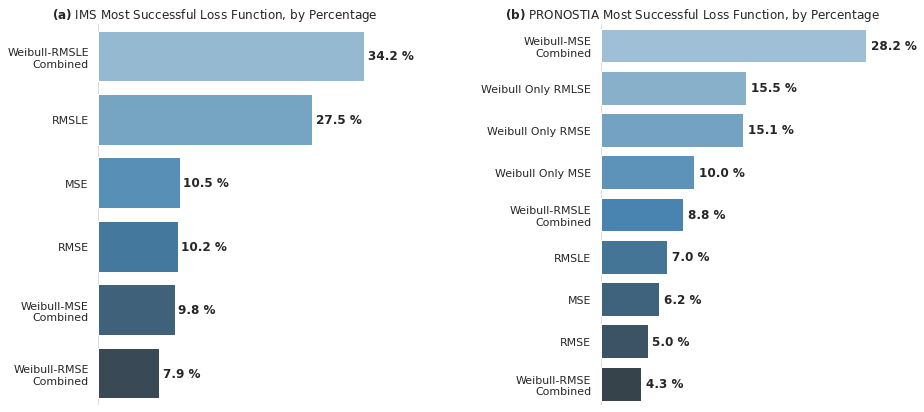

In [3]:
root_dir = Path.cwd().parent.parent
print(root_dir)

sns.set(font_scale=1.0, style="whitegrid", font="DejaVu Sans")

# csv result locations
path_results = root_dir / 'models/final/'
path_save_loc = root_dir / 'reports/figures/'

loss_function_count_fig(path_results / 'ims_count_results.csv', 
path_results / 'femto_count_results.csv', 
path_save_loc / 'loss_function_percentages.svg')